# Fashion Products on Amazon

**We will build a machine learning model to predict the prices of fashion products on Amazon**

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import os

import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [2]:
# Installing opendatasets library to download the dataset
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od

In [4]:
# Path to the dataset on kaggle website
dataset = r"https://www.kaggle.com/datasets/thedevastator/fashion-products-on-amazon-ratings-prices-and-pa"

In [5]:
# Downloading the dataset
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nipungupta26
Your Kaggle Key: ··········


100%|██████████| 8.20M/8.20M [00:00<00:00, 52.0MB/s]

In [6]:
# Directory of the downloaded datasets in local system
data_dir = r'/content/fashion-products-on-amazon-ratings-prices-and-pa'

In [7]:
# Listing out the datasets
os.listdir(data_dir)

['amazon_co-ecommerce_sample.csv']

### Reading the csv dataset

In [8]:
df = pd.read_csv('/content/fashion-products-on-amazon-ratings-prices-and-pa/amazon_co-ecommerce_sample.csv', index_col=0)

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df.head(2)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
index,,,,,,,,,,,,,,,,,
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."


**Description of the columns:**

- product_name	The name of the product. (String)
- manufacturer	The manufacturer of the product. (String)
- price	The price of the product. (Float)
- number_available_in_stock	The number of the product available in stock. (Integer)
- number_of_reviews	The number of reviews for the product. (Integer)
- number_of_answered_questions	The number of questions answered for the product. (Integer)
- average_review_rating	The average review rating for the product. (Float)
- amazon_category_and_sub_category	The Amazon category and subcategory for the product. (String)
- customers_who_bought_this_item_also_bought	The customers who bought this item also bought. (String)
- description	The description of the product. (String)
- product_information	The product information. (String)
- product_description	The product description. (String)
- items_customers_buy_after_viewing_this_item	The items customers buy after viewing this item. (String)
- customer_questions_and_answers	The customer questions and answers. (String)
- customer_reviews	The customer reviews. (String)
- sellers	The sellers. (String)

In [11]:
df.nunique()

uniq_id                                        10000
product_name                                    9964
manufacturer                                    2651
price                                           2625
number_available_in_stock                         89
number_of_reviews                                194
number_of_answered_questions                      19
average_review_rating                             19
amazon_category_and_sub_category                 255
customers_who_bought_this_item_also_bought      8755
description                                     8514
product_information                             9939
product_description                             8514
items_customers_buy_after_viewing_this_item     6749
customer_questions_and_answers                   910
customer_reviews                                9901
sellers                                         6581
dtype: int64

The columns **uniq_id**, **product_name**,**customers_who_bought_this_item_also_bought**, **description**, **product_information**, **product_description** and **items_customers_buy_after_viewing_this_item** can be dropped as they do not contribute much towars predicting the price

In [12]:
df = df.drop(['uniq_id', 'product_name', 'customers_who_bought_this_item_also_bought', 'description', 'product_information', 'product_description', 'items_customers_buy_after_viewing_this_item'], axis=1)

#### Retrieving information about the dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   manufacturer                      9993 non-null   object 
 1   price                             8565 non-null   object 
 2   number_available_in_stock         7500 non-null   object 
 3   number_of_reviews                 9982 non-null   object 
 4   number_of_answered_questions      9235 non-null   float64
 5   average_review_rating             9982 non-null   object 
 6   amazon_category_and_sub_category  9310 non-null   object 
 7   customer_questions_and_answers    914 non-null    object 
 8   customer_reviews                  9979 non-null   object 
 9   sellers                           6918 non-null   object 
dtypes: float64(1), object(9)
memory usage: 859.4+ KB


The dataset has **9 categorical columns** and **1 numerical column**. Some columns have missing values. The shape of the dataframe shows that there **10000** rows in the dataset and **10** columns/features.

Checking the datatypes of the columns

In [14]:
df.dtypes

manufacturer                         object
price                                object
number_available_in_stock            object
number_of_reviews                    object
number_of_answered_questions        float64
average_review_rating                object
amazon_category_and_sub_category     object
customer_questions_and_answers       object
customer_reviews                     object
sellers                              object
dtype: object

It can be observed that there are some continuous features that are appearing as **object** type in the dataframe. We will need to convert the data types accordingly.

#### Importing Regular Expression library

In [15]:
import re

Removing unnecessary characters from the **price** feature

In [16]:
df['price'] = [re.sub('£', '', str(e)) for e in df['price']]

In [17]:
df['price'] = [re.sub(',', '', str(e)) for e in df['price']]

In [18]:
df[df['price'] == '269.00 - 699.99']

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customer_questions_and_answers,customer_reviews,sellers
index,,,,,,,,,,
1655,Bestway,269.00 - 699.99,NaN,1,1.0,5.0 out of 5 stars,NaN,NaN,Five Stars // 5.0 // 26 Dec. 2014 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""Playtimes"", ""Se..."


In [19]:
for i, e in enumerate(df['price']):
  matcher = re.finditer('-', e)
  for m in matcher:
    df = df[df['price'] != e]

Converting the datatype of the **price** feature from **object** to **float**

In [20]:
df['price'] = df['price'].astype(float)

In [21]:
df['number_available_in_stock'] = [re.sub('\s[a-zA-Z]+', '', str(e)) for e in df['number_available_in_stock']]

Converting the datatype of the **number_available_in_stock** feature from **object** to **float**

In [22]:
df['number_available_in_stock'] = df['number_available_in_stock'].astype(float)

In [23]:
df['number_of_reviews'] = [re.sub(',', '', str(e)) for e in df['number_of_reviews']]

In [24]:
df['number_of_reviews'] = df['number_of_reviews'].astype(float)

In [25]:
df['average_review_rating'] = [re.sub(' out of 5 stars', '', str(e)) for e in df['average_review_rating']]

In [26]:
df['average_review_rating'] = df['average_review_rating'].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9982 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   manufacturer                      9975 non-null   object 
 1   price                             8547 non-null   float64
 2   number_available_in_stock         7500 non-null   float64
 3   number_of_reviews                 9964 non-null   float64
 4   number_of_answered_questions      9218 non-null   float64
 5   average_review_rating             9964 non-null   float64
 6   amazon_category_and_sub_category  9294 non-null   object 
 7   customer_questions_and_answers    913 non-null    object 
 8   customer_reviews                  9961 non-null   object 
 9   sellers                           6906 non-null   object 
dtypes: float64(5), object(5)
memory usage: 857.8+ KB


It can be observed that the datatypes have now been corrected

Description about numerical features

In [28]:
df.describe()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating
count,8547.000000,7500.000000,9964.000000,9218.000000,9964.000000
mean,20.251406,7.916933,9.123244,1.834454,4.707658
std,46.314450,8.805777,33.723984,2.517194,0.372163
min,0.010000,1.000000,1.000000,1.000000,2.300000
25%,4.990000,3.000000,1.000000,1.000000,4.500000
50%,10.560000,5.000000,2.000000,1.000000,5.000000
75%,19.990000,10.000000,6.000000,2.000000,5.000000
max,2439.920000,92.000000,1399.000000,39.000000,5.000000


Description about categorical features

In [29]:
df.describe(include=['O'])

,manufacturer,amazon_category_and_sub_category,customer_questions_and_answers,customer_reviews,sellers
count,9975,9294,913,9961,6906
unique,2650,255,909,9884,6569
top,LEGO,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,Is it 12 days or 24? // 24,Five Stars // 5.0 // 1 Feb. 2015 // By\n \n...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",..."
freq,171,880,2,5,27


# Data Leakage

During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called data leakage.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

But presence of duplicates can also cause data leakage. Therefore, we will first remove the duplicate records from the dataset and then perform train test split

#### Identifying and removing duplicate rows in the dataset

In [30]:
df.duplicated(subset=None, keep='first').sum()

11

In [31]:
df.shape

(9982, 10)

In [32]:
df = df[df.duplicated(df.columns.tolist(), keep='first')==False]

In [33]:
df.duplicated(subset=None, keep='first').sum()

0

There are no duplicate values in the data

The indices of the dataframe will have to be reset

In [34]:
df.reset_index(inplace = True, drop = True)

#### Splitting the dataset into training and testing datasets

In [35]:
X = df.drop(columns=["price"], axis=1)
Y = df.price

In [36]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, shuffle=True)

Resetting the indices for the training dataframes

In [37]:
X_train.reset_index(inplace = True, drop = True)

In [38]:
y_train.reset_index(inplace = True, drop = True)

Joining the training dataframe

In [39]:
df_train = X_train.join(y_train, how='inner')

Resetting the indices for the testing dataframes

In [40]:
X_test.reset_index(inplace = True, drop = True)

In [41]:
y_test.reset_index(inplace = True, drop = True)

Joining the testing dataframe

In [42]:
df_test = X_test.join(y_test, how='inner')

## Data Preprocessing and cleaning in the training dataframe

In [43]:
df_train.isnull().sum()

manufacturer                           5
number_available_in_stock           1726
number_of_reviews                     14
number_of_answered_questions         535
average_review_rating                 14
amazon_category_and_sub_category     465
customer_questions_and_answers      6350
customer_reviews                      16
sellers                             2173
price                               1029
dtype: int64

In [44]:
(df_train.isnull().sum()/len(df_train))*100

manufacturer                         0.071644
number_available_in_stock           24.731337
number_of_reviews                    0.200602
number_of_answered_questions         7.665855
average_review_rating                0.200602
amazon_category_and_sub_category     6.662846
customer_questions_and_answers      90.987247
customer_reviews                     0.229259
sellers                             31.136266
price                               14.744233
dtype: float64

Dropping features with more than 90% missing values and dropping rows for columns having less than 1% missing values

In [45]:
for feature in df_train.columns:
  if (df_train[feature].isnull().sum()/len(df_train))*100 > 90:
    df_train = df_train.drop([feature], axis=1)
  elif (df_train[feature].isnull().sum()/len(df_train))*100 <= 1:
    df_train = df_train.dropna(subset=[feature])

In [46]:
(df_train.isnull().sum()/len(df_train))*100

manufacturer                         0.000000
number_available_in_stock           24.719747
number_of_reviews                    0.000000
number_of_answered_questions         7.674619
average_review_rating                0.000000
amazon_category_and_sub_category     6.596723
customer_reviews                     0.000000
sellers                             31.187123
price                               14.716873
dtype: float64

Extracting features for imputing missing values

In [47]:
NaN_features = [feature for feature in df_train.columns if (df_train[feature].count() < df_train.shape[0]) and (feature in df_train.select_dtypes(np.number).columns)]
NaN_features

['number_available_in_stock', 'number_of_answered_questions', 'price']

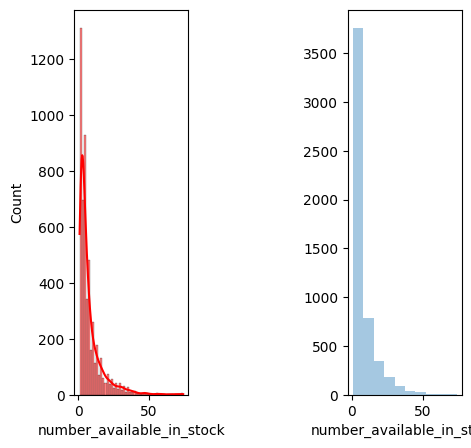

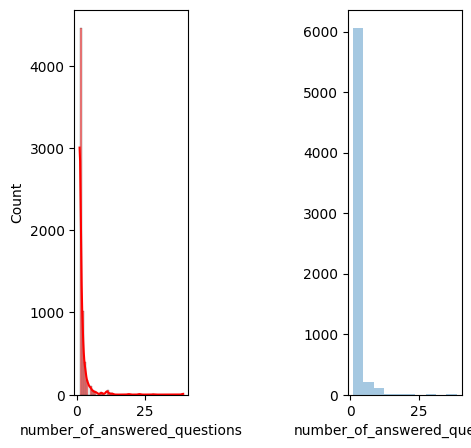

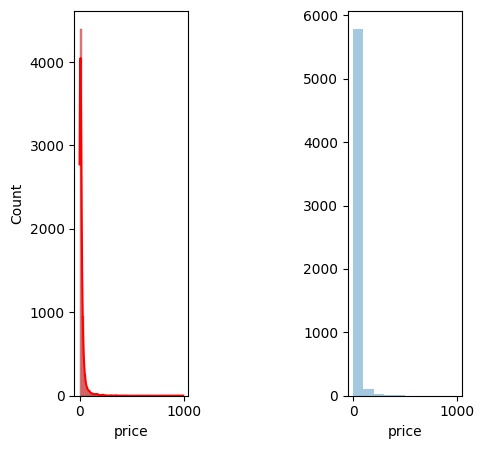

In [48]:
for feature in NaN_features:
    plt.figure(figsize=(5,5))
    plt.subplot(1,3,1)
    #sns.distplot(df_train[feature], color='red')
    sns.histplot(x = df_train[feature].dropna(), kde = True, color='red', bins=50)
    plt.subplot(1,3,3)
    #plt.hist(df_train[feature], bins=20)
    sns.distplot(df_train[feature], bins=10, kde = False)

In [49]:
df_train['number_available_in_stock'] = df_train['number_available_in_stock'].fillna(df_train['number_available_in_stock'].median())

In [50]:
df_train['number_of_answered_questions'] = df_train['number_of_answered_questions'].fillna(df_train['number_of_answered_questions'].median())

In [51]:
df_train['price'] = df_train['price'].fillna(df_train['price'].median())

In [52]:
(df_train.isnull().sum()/len(df_train))*100

manufacturer                         0.000000
number_available_in_stock            0.000000
number_of_reviews                    0.000000
number_of_answered_questions         0.000000
average_review_rating                0.000000
amazon_category_and_sub_category     6.596723
customer_reviews                     0.000000
sellers                             31.187123
price                                0.000000
dtype: float64

#### Extracting the predictor continuous features from the training data

In [53]:
continuous_features = [feature for feature in df_train.select_dtypes(np.number).columns if feature not in ['price']]

In [54]:
continuous_features

['number_available_in_stock',
 'number_of_reviews',
 'number_of_answered_questions',
 'average_review_rating']

#### Plotting Boxplot and Q-Q plot to identify Univariate outliers

In [55]:
import scipy.stats as stat
import pylab

In [56]:
def create_boxplots(dataset, feature_list):
    for feature in feature_list:
      plt.figure(figsize=(5,5))
      plt.ticklabel_format(style='plain')
      plt.suptitle("Boxplot and Q-Q plot of " + feature, fontweight="bold", fontsize=15)
      #dataset.boxplot(column=feature)
      plt.subplot(2,3,1)
      sns.boxplot(y=feature, data=dataset, color='orange')
      #plt.ylabel(feature)
      #plt.title(feature)
      plt.subplot(2,3,3)
      stat.probplot(dataset[feature], dist='norm', plot=pylab)
      plt.show()

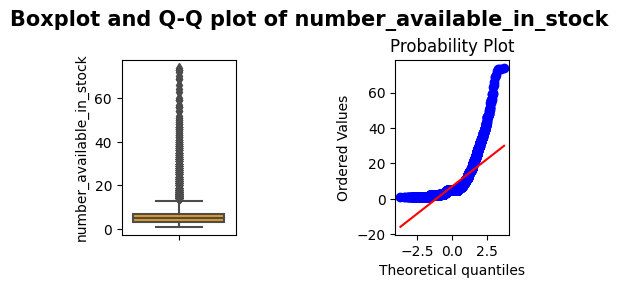

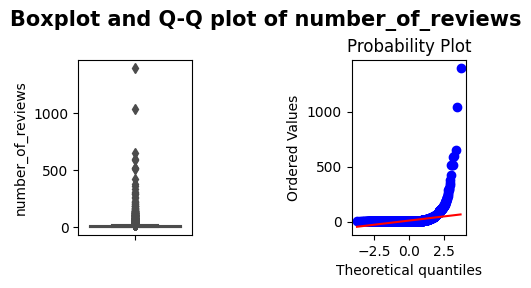

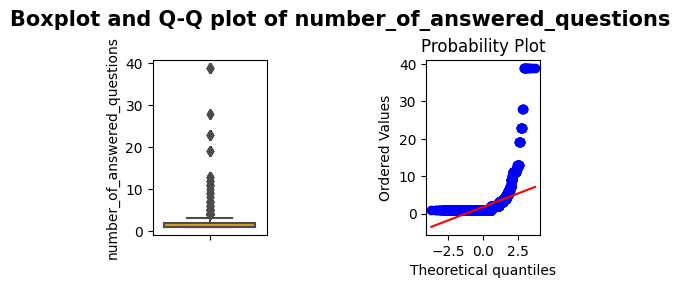

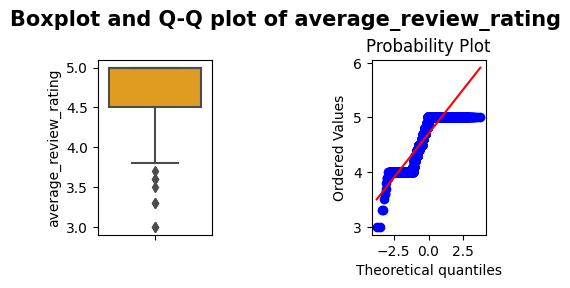

In [57]:
create_boxplots(df_train, continuous_features)

Defining function to remove the univariate outliers

In [58]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(3)
        #print(feature, lower_bridge)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(3)
        #print(feature, upper_bridge)
        if lower_bridge != upper_bridge:
          dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
          dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge
        else:
          lower_bridge = dataset[feature].quantile(0.25)/2
          upper_bridge = dataset[feature].quantile(0.75) * 2
          dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
          dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [59]:
remove_outliers(df_train, continuous_features)

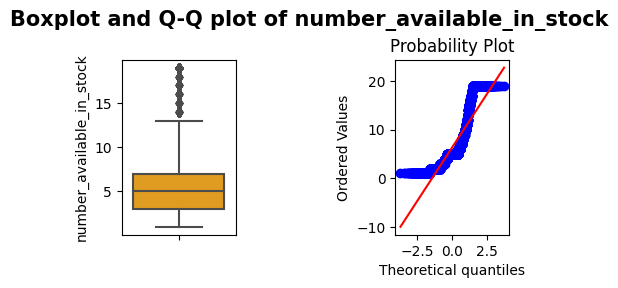

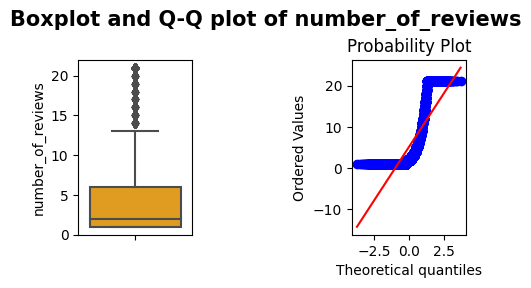

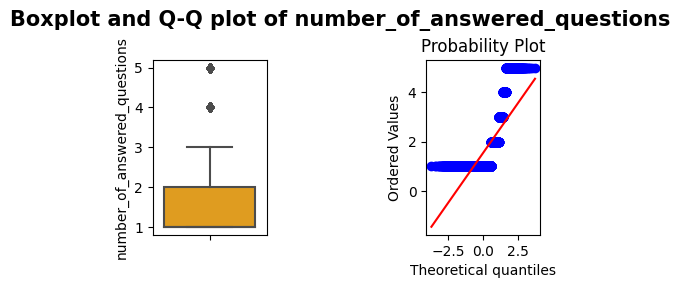

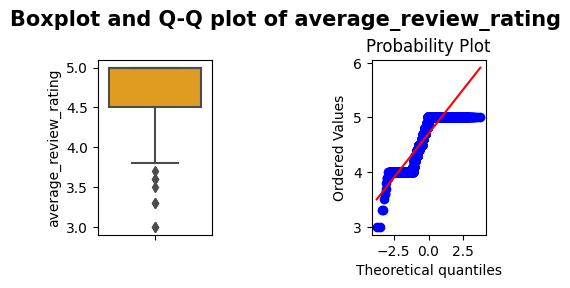

In [60]:
create_boxplots(df_train, continuous_features)

The univariate outliers have been treated

#### Plotting histograms and distplots to check the distributions of continuous variables

In [61]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(10,10))
        plt.suptitle("Histogram and Q-Q plot of variable " + feature, fontweight="bold", fontsize=15)
        plt.subplot(3,5,1)
        plt.ticklabel_format(style='plain')
        #plt.hist(dataset[feature].dropna())
        sns.histplot(x = dataset[feature].dropna(), kde = True)
        plt.title(feature)
        plt.subplot(3,5,3)
        plt.ticklabel_format(style='plain')
        sns.distplot(dataset[feature])
        plt.ylabel('Count/Frequency')
        plt.subplot(3,5,5)
        stat.probplot(dataset[feature], dist='norm', plot=pylab)
        plt.show()

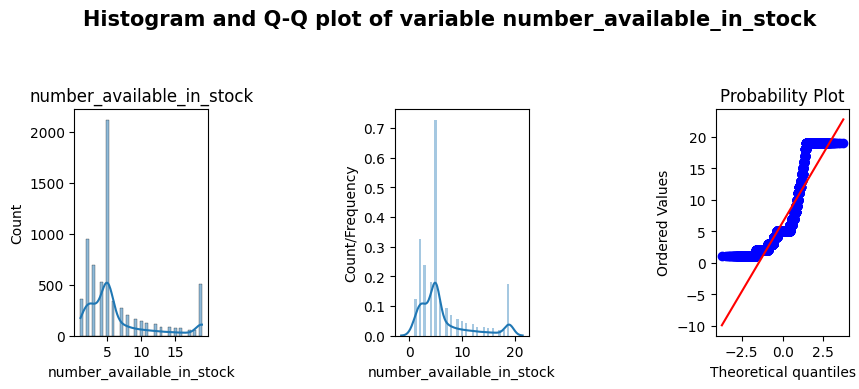

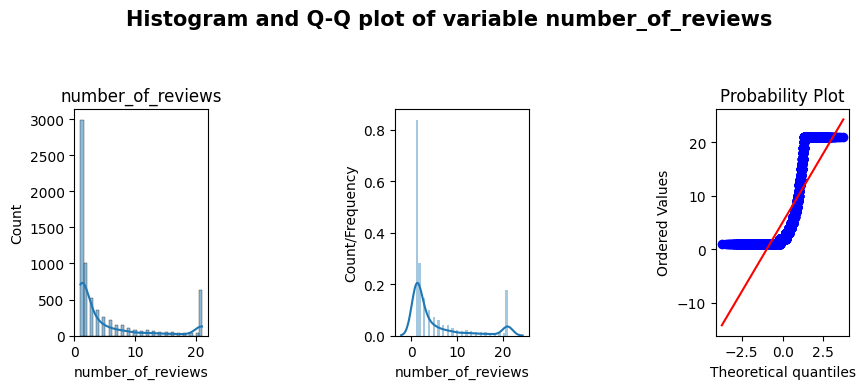

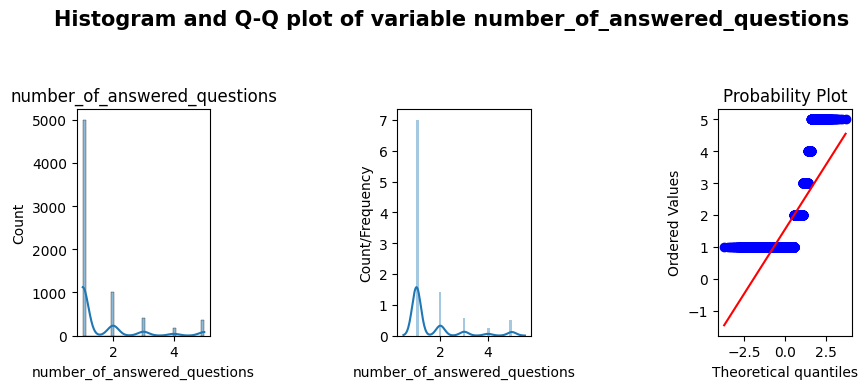

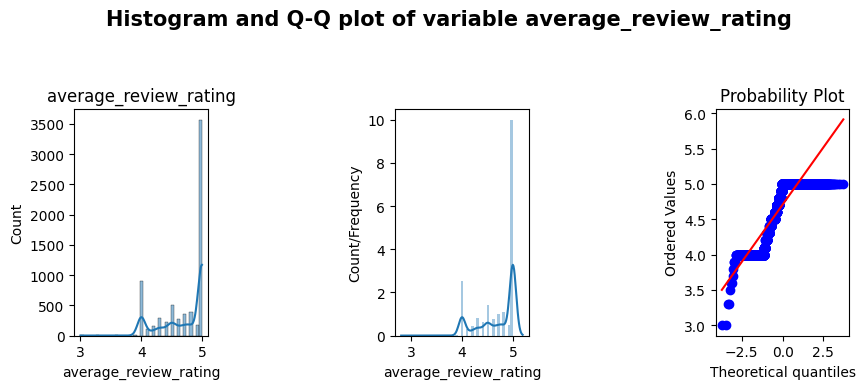

In [62]:
create_histograms_distplots(df_train, continuous_features)

From the above plots, it can observed that the features are skewed

#### Performing transformation to remove skeweness

In [63]:
from scipy.stats import skew

In [64]:
def skewness_score(dataset, feature_list):
    variables = []
    skew_scores = []
    square_root_transformed_skew_scores = []
    log_transformed_skew_scores = []
    #exp_transformed_skew_scores = []
    #boxcox_transformed_skew_scores = []
    for feature in feature_list:
      column_name_square_root = ''
      column_name_log = ''
      variables.append(feature)
      skew_scores.append(skew(dataset[feature]))
      #print(feature, skew(dataset[feature]))
      if (float(skew(dataset[feature])) >= 0.5) | (float(skew(dataset[feature])) <= -0.5):
        if dataset[feature].min() > 0:
          #column_name_square_root = f'{str(feature)} square root transformed'
          #dataset[column_name_square_root] = np.sqrt(dataset[feature])
          #dataset[feature] = np.sqrt(dataset[feature])
          #column_name_log = f'{str(feature)} log transformed'
          #dataset[column_name_log] = np.log(dataset[feature])
          dataset[feature] = np.log(dataset[feature])
          #square_root_transformed_skew_scores.append(skew(dataset[column_name_square_root]))
          #square_root_transformed_skew_scores.append(skew(dataset[feature]))
          #log_transformed_skew_scores.append(skew(dataset[column_name_log]))
          log_transformed_skew_scores.append(skew(dataset[feature]))
        else:
          #square_root_transformed_skew_scores.append('Not transformed')
          log_transformed_skew_scores.append('Not transformed')
        #column_name_exp = f'{str(feature)} exp transformed'
        #dataset[feature] = np.exp(dataset[feature])
        #exp_transformed_skew_scores.append(skew(dataset[feature]))
        #boxcox_transformed_skew_scores.append(skew(dataset[column_name_exp]))
      else:
        #pass
        #square_root_transformed_skew_scores.append('Not transformed')
        log_transformed_skew_scores.append('Not transformed')
        #exp_transformed_skew_scores.append('Not transformed')
        #boxcox_transformed_skew_scores.append('Not transformed')
    #print(len(variables))
    #print(len(skew_scores))
    #print(len(square_root_transformed_skew_scores))
    #print(len(log_transformed_skew_scores))
    #print(skew_scores)
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores, 'Skewness score after boxcox transformation of skewed features': boxcox_transformed_skew_scores}
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores}
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores}
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores}
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores}
    skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores}
    skewness_score = pd.DataFrame(skew_dict)
    return skewness_score

In [65]:
skewness_score(df_train, continuous_features)

,Feature,Skewness Score before transformation,Skewness score after log transformation of skewed features
0,number_available_in_stock,1.449384,-0.020034
1,number_of_reviews,1.655557,0.708623
2,number_of_answered_questions,2.131129,1.505072
3,average_review_rating,-0.912813,-0.993711


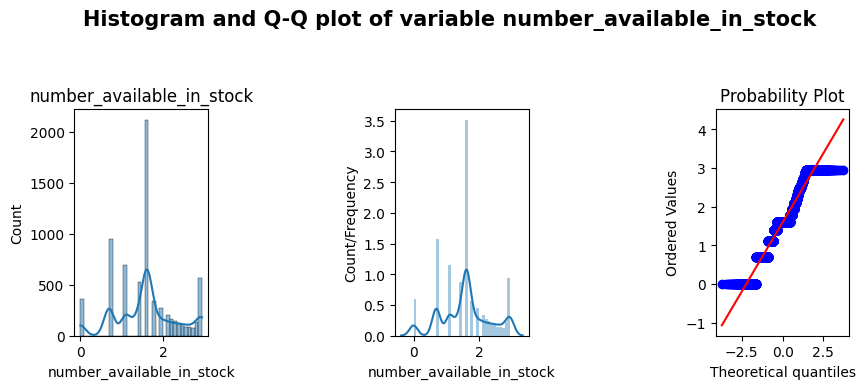

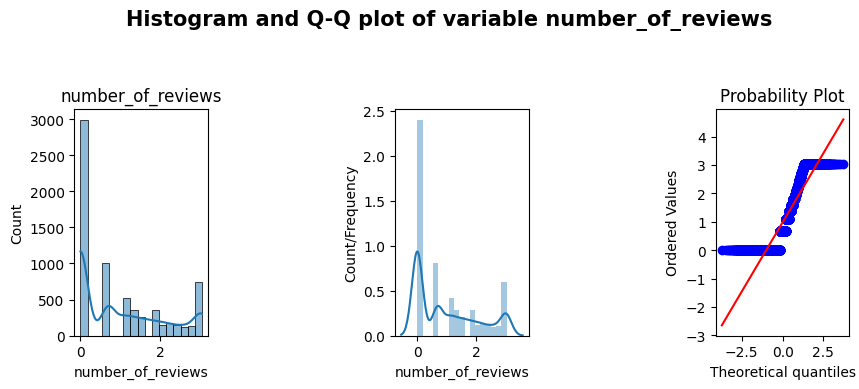

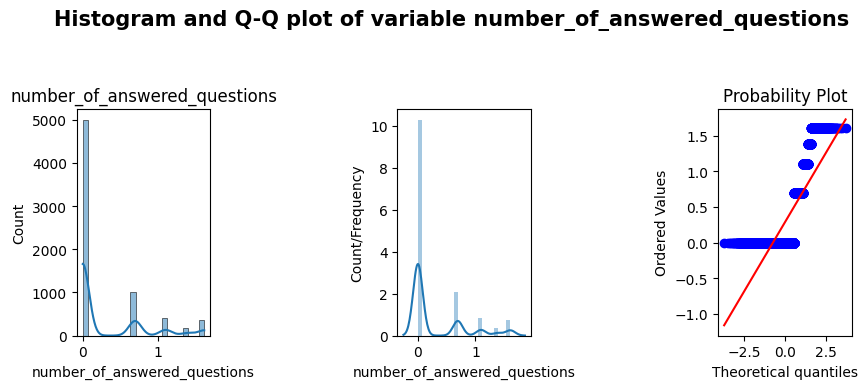

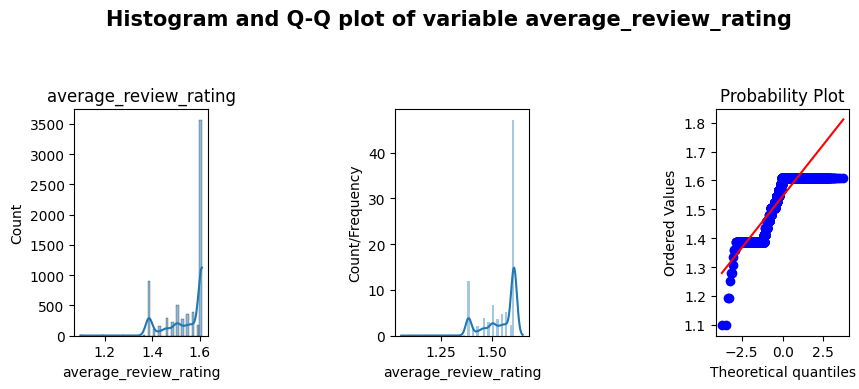

In [66]:
create_histograms_distplots(df_train, continuous_features)

The skewness has been handled using **log transformation**

#### Plotting relplot

In [67]:
def create_relplot(dataset, list_of_features, target):
    for feature in list_of_features:
        for bivariate_feature in list_of_features:
            if bivariate_feature != feature:
                plt.figure(figsize=(7,7))
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue=target)
                plt.show()

<Figure size 700x700 with 0 Axes>

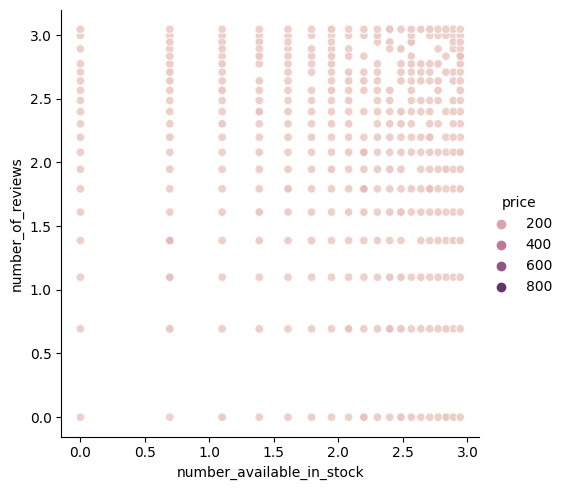

<Figure size 700x700 with 0 Axes>

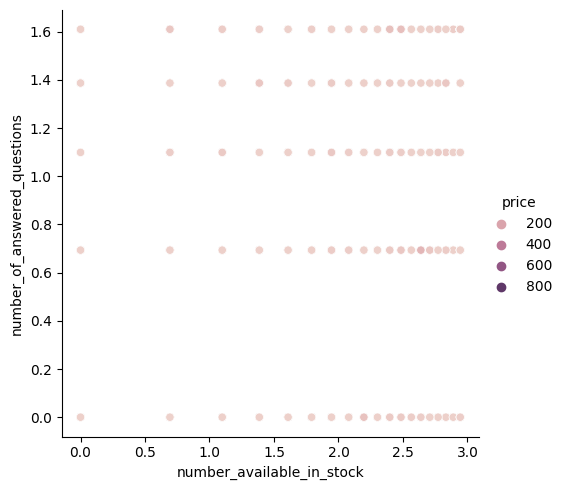

<Figure size 700x700 with 0 Axes>

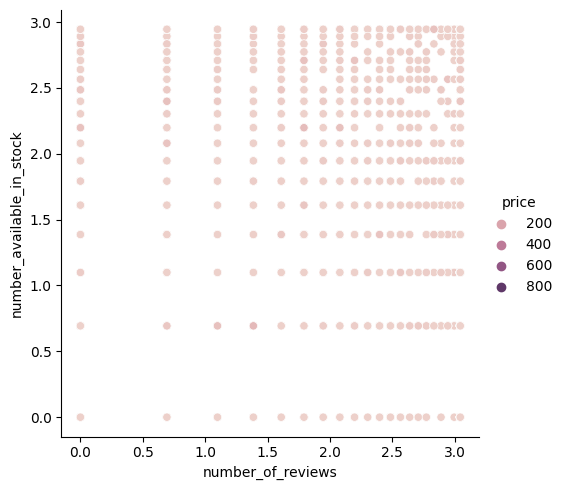

<Figure size 700x700 with 0 Axes>

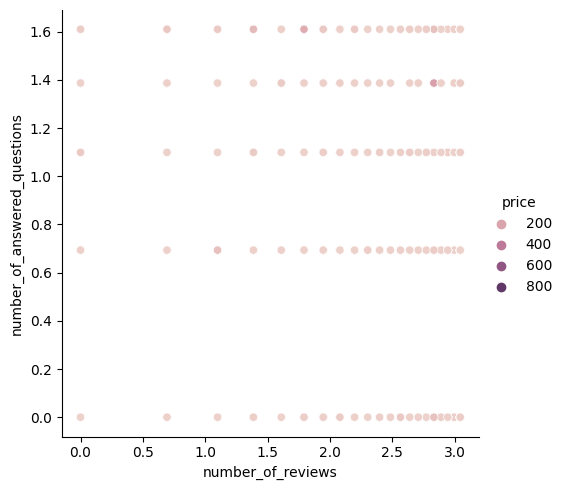

<Figure size 700x700 with 0 Axes>

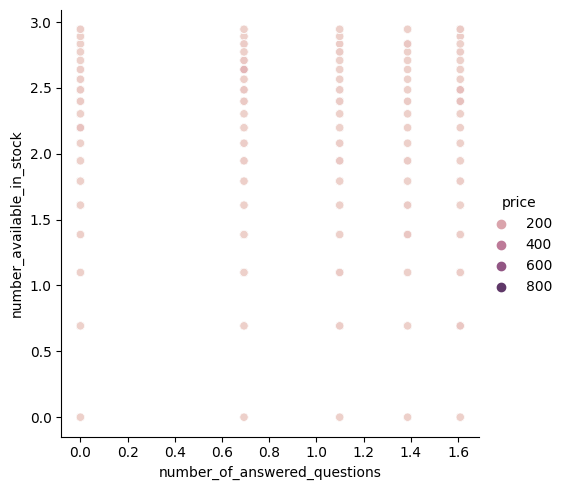

<Figure size 700x700 with 0 Axes>

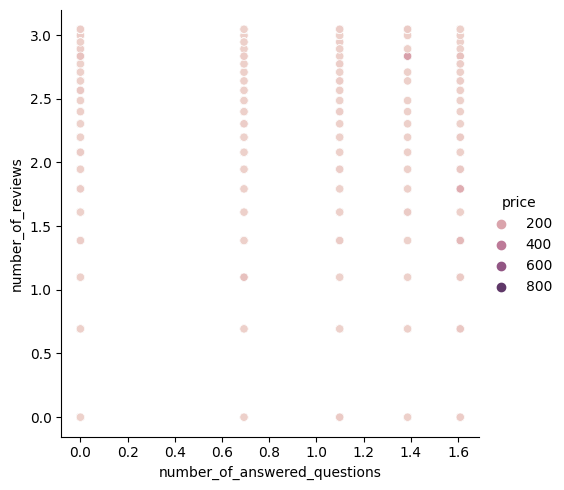

In [68]:
create_relplot(df_train, continuous_features[:3], 'price')

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6958 entries, 0 to 6978
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   manufacturer                      6958 non-null   object 
 1   number_available_in_stock         6958 non-null   float64
 2   number_of_reviews                 6958 non-null   float64
 3   number_of_answered_questions      6958 non-null   float64
 4   average_review_rating             6958 non-null   float64
 5   amazon_category_and_sub_category  6499 non-null   object 
 6   customer_reviews                  6958 non-null   object 
 7   sellers                           4788 non-null   object 
 8   price                             6958 non-null   float64
dtypes: float64(5), object(4)
memory usage: 801.6+ KB


#### Extracting the categorical features

In [70]:
NaN_object_features = [feature for feature in df_train.columns if (df_train[feature].count() < df_train.shape[0]) and (feature in df_train.select_dtypes(np.object).columns)]

In [71]:
NaN_object_features

['amazon_category_and_sub_category', 'sellers']

In [72]:
for i in df_train[~df_train['amazon_category_and_sub_category'].isnull()].index:
  df_train.at[i,'amazon_category_and_sub_category']  = str(df_train.at[i,'amazon_category_and_sub_category']).split(' > ')[-1]

In [73]:
df_train.head(2)

,manufacturer,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customer_reviews,sellers,price
0,Rolls Royce,0.693147,0.000000,0.693147,1.386294,Vehicles,Four Stars // 4.0 // 29 Jan. 2015 // 2 of 2 pe...,"{""seller""=>[{""Seller_name_1""=>""ModelCarWorld"",...",74.55
1,Karnival,1.609438,1.098612,1.386294,1.609438,Card Games,great // 5.0 // 10 Dec. 2013 // By\n \n ...,"{""seller""=>{""Seller_name_1""=>""bigblindmedia"", ...",4.99


In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6958 entries, 0 to 6978
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   manufacturer                      6958 non-null   object 
 1   number_available_in_stock         6958 non-null   float64
 2   number_of_reviews                 6958 non-null   float64
 3   number_of_answered_questions      6958 non-null   float64
 4   average_review_rating             6958 non-null   float64
 5   amazon_category_and_sub_category  6499 non-null   object 
 6   customer_reviews                  6958 non-null   object 
 7   sellers                           4788 non-null   object 
 8   price                             6958 non-null   float64
dtypes: float64(5), object(4)
memory usage: 801.6+ KB


In [75]:
def impute_dataset(dataset, categoricalColumn, cols):
  for feature in cols:
    for col in dataset[categoricalColumn].value_counts().keys().tolist():
      if dataset[feature][dataset[categoricalColumn]==col].count() > 0:
        dataset[feature][dataset[categoricalColumn]==col] = dataset[feature][dataset[categoricalColumn]==col].fillna(dataset[feature][dataset[categoricalColumn] == col].mode()[0])
      else:
        dataset[feature][dataset[categoricalColumn]==col] = dataset[feature][dataset[categoricalColumn]==col].fillna(dataset[feature].mode()[0])

In [76]:
impute_dataset(df_train, 'manufacturer', ['amazon_category_and_sub_category'])

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6958 entries, 0 to 6978
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   manufacturer                      6958 non-null   object 
 1   number_available_in_stock         6958 non-null   float64
 2   number_of_reviews                 6958 non-null   float64
 3   number_of_answered_questions      6958 non-null   float64
 4   average_review_rating             6958 non-null   float64
 5   amazon_category_and_sub_category  6958 non-null   object 
 6   customer_reviews                  6958 non-null   object 
 7   sellers                           4788 non-null   object 
 8   price                             6958 non-null   float64
dtypes: float64(5), object(4)
memory usage: 801.6+ KB


In [78]:
df_train['sellers'][~df_train['sellers'].isnull()] = [re.sub('{"seller"=>', '', e) for e in df_train['sellers'][~df_train['sellers'].isnull()]]

In [79]:
df_train['sellers'][~df_train['sellers'].isnull()] = [re.sub('[[]', '', e) for e in df_train['sellers'][~df_train['sellers'].isnull()]]

In [80]:
df_train['sellers'][~df_train['sellers'].isnull()] = [re.sub(']}', '', e) for e in df_train['sellers'][~df_train['sellers'].isnull()]]

In [81]:
df_train['sellers'][~df_train['sellers'].isnull()] = [re.sub('}}', '}', e) for e in df_train['sellers'][~df_train['sellers'].isnull()]]

In [82]:
df_train.reset_index(inplace = True, drop = True)

In [83]:
for i, e in enumerate(df_train['sellers']):
  try:
    if np.isnan(df_train.loc[i, 'sellers']):
      continue
  except Exception:
    pass
  index = None
  l1 = []
  l1 = e.split(', ')
  flag = False
  for j, f in enumerate(l1[1::2]):
    matcher = re.finditer('[0-9]+[.][0-9]+', e)
    for m in matcher:
      if str(m.group()) == str(df_train.at[i,'price']):
        index = f[13:15]
        for k in l1:
          if index in k:
            df_train.at[i,'sellers']  = str(k[19:-1])
            break
        flag = True
        break
    if flag == True:
      break
  if index is None:
    df_train.at[i,'sellers']  = np.nan

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6958 entries, 0 to 6957
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   manufacturer                      6958 non-null   object 
 1   number_available_in_stock         6958 non-null   float64
 2   number_of_reviews                 6958 non-null   float64
 3   number_of_answered_questions      6958 non-null   float64
 4   average_review_rating             6958 non-null   float64
 5   amazon_category_and_sub_category  6958 non-null   object 
 6   customer_reviews                  6958 non-null   object 
 7   sellers                           3478 non-null   object 
 8   price                             6958 non-null   float64
dtypes: float64(5), object(4)
memory usage: 489.4+ KB


In [85]:
df_train.head(10)

,manufacturer,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customer_reviews,sellers,price
0,Rolls Royce,0.693147,0.000000,0.693147,1.386294,Vehicles,Four Stars // 4.0 // 29 Jan. 2015 // 2 of 2 pe...,ModelCarWorld,74.55
1,Karnival,1.609438,1.098612,1.386294,1.609438,Card Games,great // 5.0 // 10 Dec. 2013 // By\n \n ...,bigblindmedia,4.99
2,Wild Republic,1.098612,0.000000,0.000000,1.386294,Hand Puppets,nice little tiger // 4.0 // 5 Nov. 2013 // By\...,Animal Gifts 4 U,14.01
3,Royal Magic,1.098612,0.693147,0.000000,1.609438,Card Games,Just what I expected // 5.0 // 3 Feb. 2013 // ...,Now That's a Deal!,5.99
4,PolysGems,1.609438,2.890372,0.693147,1.386294,Garlands,Pic is of 5 separate lengths together // 1.0 /...,NaN,6.75
5,GRAHAM'S GAMES,1.791759,2.564949,0.000000,1.609438,Dice & Dice Games,"Durable, portable dice game // 5.0 // 17 Dec. ...",pinkcatshop,11.69
6,TREND ENTERPRISES INC.,1.098612,0.000000,1.098612,1.609438,Paper & Stickers,Five Stars // 5.0 // 6 Dec. 2015 // By\n \n...,Sticker Stocker,4.95
7,VTech,1.386294,1.386294,0.000000,1.609438,VTech,keep them occupied // 5.0 // 22 Jan. 2013 // B...,The Bookstop,3.94
8,Yu Gi Oh,2.944439,0.693147,0.693147,1.504077,Packs & Sets,tin box // 5.0 // 22 Jan. 2013 // By\n \n ...,Sukiyaki JP,12.89
9,Brookite,1.386294,3.044522,0.693147,1.458615,Kites & Flight Toys,Pinwheel Magic! // 4.0 // 26 Jun. 2013 // By\n...,NaN,9.20


Text(0.5, 0, 'Length of Review')

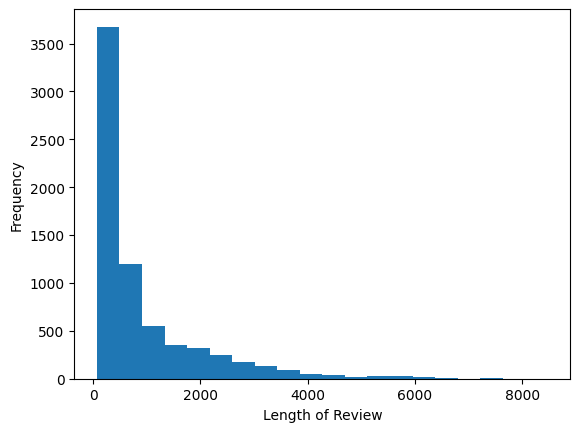

In [86]:
df_train['customer_reviews'].apply(len).plot(bins=20, kind='hist')
plt.xlabel('Length of Review')

In [87]:
df_train['customer_reviews'].apply(len).describe()

count    6958.000000
mean      901.350963
std      1115.019750
min        70.000000
25%       188.250000
50%       442.000000
75%      1139.000000
max      8478.000000
Name: customer_reviews, dtype: float64

In [88]:
import re
import string

In [89]:
def remove_punctuation(text):
    no_punct = "".join([c if c not in string.punctuation else " " for c in text])
    return no_punct

In [90]:
df_train['customer_reviews'] = df_train['customer_reviews'].apply(lambda x: remove_punctuation(x))

In [91]:
df_train['customer_reviews'] = df_train['customer_reviews'].str.lower()

In [92]:
df_train['customer_reviews'] = [re.sub('\d+', '', e) for e in df_train['customer_reviews']]

In [93]:
df_train['customer_reviews'] = [re.sub('\n', '', e) for e in df_train['customer_reviews']]

In [94]:
df_train['customer_reviews'] = [re.sub('\s+', ' ', e) for e in df_train['customer_reviews']]

In [95]:
df_train['customer_reviews'] = df_train['customer_reviews'].str.strip()

In [96]:
char=['☆', '✌', '—', '♥️', '❤']

In [97]:
for ch in char:
  df_train['customer_reviews'] = df_train['customer_reviews'].str.replace(ch, '')

In [98]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [99]:
from nltk.tokenize import word_tokenize

In [100]:
df_train['customer_reviews'] = df_train['customer_reviews'].apply(word_tokenize)

In [101]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [102]:
stopwords_english = stopwords.words('english')

In [103]:
print(stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [104]:
stopwords_english_set = set(stopwords_english)

In [105]:
stopwords_english_set = stopwords_english_set.difference({'until', 'while', 'against', 'between', 'during', 'before', 'after', 'above', 'below', 'not'})

In [106]:
stopwords_english = list(stopwords_english_set)

In [107]:
print(stopwords_english)

['having', 'is', 'can', 'only', 'there', "you've", 'where', "should've", 'that', 've', 'on', "couldn't", 'with', 'been', 'no', 'because', "that'll", 'an', 'any', 'hasn', 'to', 'his', 'more', 'it', "it's", 'as', 'other', 'll', "you'll", 'our', 'here', 'these', 'whom', 'themselves', "didn't", 'their', "hadn't", 'now', 'once', 'did', "shan't", 'didn', 'myself', 'about', 'what', 'don', 'has', "mustn't", 'yourselves', 'the', 'same', 's', 'into', 'ma', 'such', 'a', 'o', 'up', 'at', 'then', 'down', 'me', 'will', 'aren', "doesn't", 'from', 'shouldn', 'should', 'but', 'your', 'by', 'you', 'through', 'over', 'mightn', 'wasn', "weren't", 'too', 'both', "aren't", 'herself', 'them', "you'd", 'he', 'were', 'few', 'was', 'very', "haven't", 'again', 'and', 'haven', 'needn', "mightn't", "wouldn't", 't', 'each', 'weren', 'i', 're', 'be', 'out', 'for', 'we', 'being', 'yourself', 'her', 'if', "you're", 'mustn', 'when', 'does', 'why', "won't", 'do', 'nor', "isn't", 'its', 'theirs', "needn't", 'my', 'y', 'u

In [108]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords_english]
    return words

In [109]:
df_train['customer_reviews'] = df_train['customer_reviews'].apply(lambda x: remove_stopwords(x))

In [110]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [111]:
from nltk.stem import WordNetLemmatizer

In [112]:
lemmatizer = WordNetLemmatizer()

In [113]:
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [114]:
df_train['customer_reviews'] = df_train['customer_reviews'].apply(lambda x: word_lemmatizer(x))

In [115]:
def clean_alt_list(list_):
    list_ = str(list_)
    return list_

In [116]:
df_train['processed_customer_reviews'] = df_train['customer_reviews'].apply(clean_alt_list)

In [117]:
from wordcloud import WordCloud

In [118]:
word_cloud_text = ''.join(df_train['processed_customer_reviews'])

In [119]:
wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

Word Cloud based on all the reviews


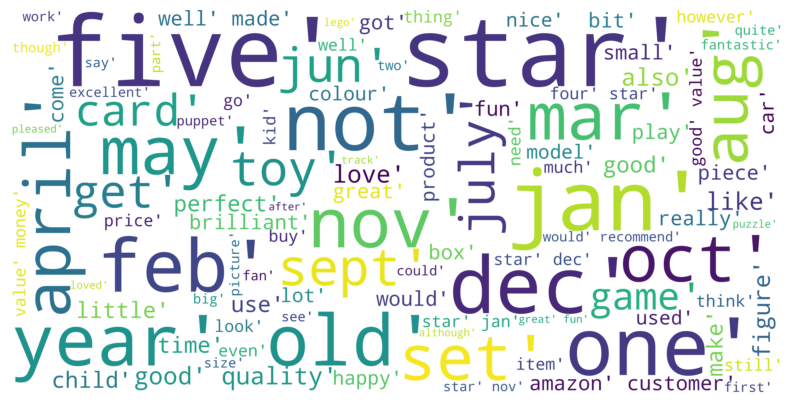

In [120]:
print('Word Cloud based on all the reviews')
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

In [121]:
from textblob import TextBlob

In [122]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [123]:
df_train['customer_reviews'] = df_train['customer_reviews'].apply(lambda x: " ".join(x))

In [124]:
df_train['Polarity'] = df_train['customer_reviews'].apply(pol)
df_train['Subjectivity'] = df_train['customer_reviews'].apply(sub)

In [125]:
df_train.head(10)

,manufacturer,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customer_reviews,sellers,price,processed_customer_reviews,Polarity,Subjectivity
0,Rolls Royce,0.693147,0.000000,0.693147,1.386294,Vehicles,four star jan people found following review he...,ModelCarWorld,74.55,"['four', 'star', 'jan', 'people', 'found', 'fo...",0.000000,0.100000
1,Karnival,1.609438,1.098612,1.386294,1.609438,Card Games,great dec arkadiusz dec found better manipulat...,bigblindmedia,4.99,"['great', 'dec', 'arkadiusz', 'dec', 'found', ...",0.553472,0.745833
2,Wild Republic,1.098612,0.000000,0.000000,1.386294,Hand Puppets,nice little tiger nov kristian nov wild republ...,Animal Gifts 4 U,14.01,"['nice', 'little', 'tiger', 'nov', 'kristian',...",0.131250,0.465000
3,Royal Magic,1.098612,0.693147,0.000000,1.609438,Card Games,expected feb magic feb card bicycle quality ai...,Now That's a Deal!,5.99,"['expected', 'feb', 'magic', 'feb', 'card', 'b...",0.179167,0.441667
4,PolysGems,1.609438,2.890372,0.693147,1.386294,Garlands,pic separate length together mar tracy wright ...,NaN,6.75,"['pic', 'separate', 'length', 'together', 'mar...",0.104545,0.604545
5,GRAHAM'S GAMES,1.791759,2.564949,0.000000,1.609438,Dice & Dice Games,durable portable dice game dec mp barker dec g...,pinkcatshop,11.69,"['durable', 'portable', 'dice', 'game', 'dec',...",0.103212,0.496491
6,TREND ENTERPRISES INC.,1.098612,0.000000,1.098612,1.609438,Paper & Stickers,five star dec amazon customer dec order delive...,Sticker Stocker,4.95,"['five', 'star', 'dec', 'amazon', 'customer', ...",0.333333,0.500000
7,VTech,1.386294,1.386294,0.000000,1.609438,VTech,keep occupied jan gail jan allow child play le...,The Bookstop,3.94,"['keep', 'occupied', 'jan', 'gail', 'jan', 'al...",0.512500,0.591071
8,Yu Gi Oh,2.944439,0.693147,0.693147,1.504077,Packs & Sets,tin box jan izzy jan tin look good good size k...,Sukiyaki JP,12.89,"['tin', 'box', 'jan', 'izzy', 'jan', 'tin', 'l...",0.560000,0.600000
9,Brookite,1.386294,3.044522,0.693147,1.458615,Kites & Flight Toys,pinwheel magic jun b jun ue ue count reviewscu...,NaN,9.20,"['pinwheel', 'magic', 'jun', 'b', 'jun', 'ue',...",0.241210,0.587688


In [126]:
df_train = df_train.drop(['processed_customer_reviews', 'customer_reviews'], axis=1)

In [127]:
df_train.columns

Index(['manufacturer', 'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category', 'sellers', 'price', 'Polarity',
       'Subjectivity'],
      dtype='object')

In [128]:
categorical_features = [feature for feature in df_train.select_dtypes(np.object).columns]

In [129]:
df_train[categorical_features].nunique()

manufacturer                        2151
amazon_category_and_sub_category     213
sellers                             1314
dtype: int64

In [130]:
dict_labels = {}
for feature in categorical_features:
  if df_train[feature].nunique() > 2:
    x = df_train[feature].value_counts().keys().tolist()
    y = df_train[feature].value_counts().tolist()
    l_labels = []
    l_counts = []
    #print(feature, x, y)
    for i in y:
      if (i/len(df_train))*100 > 1.4:
        ind = y.index(i)
        if x[ind] not in l_labels:
          #print(x[ind], y[ind])
          l_labels.append(x[ind])
          l_counts.append(i)
    dict_labels[feature] = [l_labels, l_counts]

In [131]:
dict_labels

{'manufacturer': [['LEGO', 'Disney', 'Oxford Diecast'], [115, 114, 107]],
 'amazon_category_and_sub_category': [['Vehicles',
   'Toys',
   'Science Fiction & Fantasy',
   'Bead Art & Jewellery-Making',
   'Packs & Sets',
   'Accessories',
   'Banners',
   'Dice & Dice Games',
   'Balloons',
   'Hand Puppets',
   'Card Games',
   'Masks',
   'Soft Dolls',
   'Trains',
   "Dolls' House Accessories",
   'Temporary Tattoos',
   'Hasbro',
   'Tanks',
   'Paper & Stickers'],
  [863,
   437,
   368,
   261,
   228,
   214,
   208,
   197,
   188,
   173,
   169,
   134,
   126,
   121,
   117,
   105,
   102,
   101,
   99]],
 'sellers': [['Amazon.co.uk'], [361]]}

In [132]:
for feature in dict_labels.keys():
   for l in dict_labels[feature][0]:
    df_train[l] = np.where(df_train[feature] == l, 1, 0)

In [133]:
df_train = df_train.drop(['manufacturer', 'amazon_category_and_sub_category', 'sellers'], axis=1)

In [134]:
df_train.columns

Index(['number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating', 'price',
       'Polarity', 'Subjectivity', 'LEGO', 'Disney', 'Oxford Diecast',
       'Vehicles', 'Toys', 'Science Fiction & Fantasy',
       'Bead Art & Jewellery-Making', 'Packs & Sets', 'Accessories', 'Banners',
       'Dice & Dice Games', 'Balloons', 'Hand Puppets', 'Card Games', 'Masks',
       'Soft Dolls', 'Trains', 'Dolls' House Accessories', 'Temporary Tattoos',
       'Hasbro', 'Tanks', 'Paper & Stickers', 'Amazon.co.uk'],
      dtype='object')

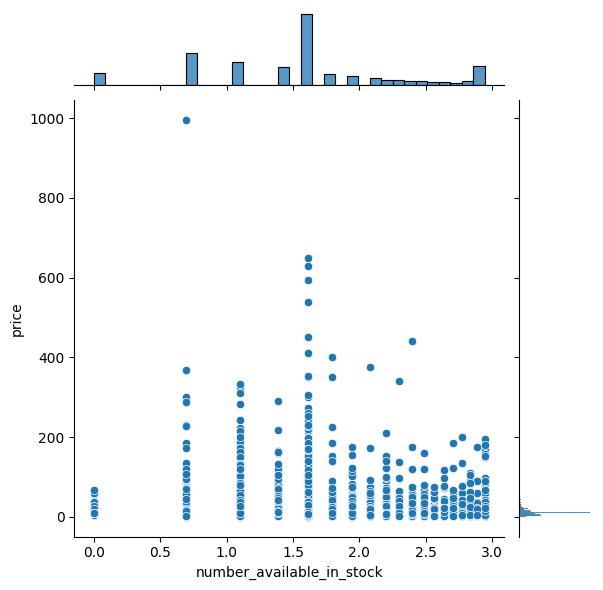

In [135]:
sns.jointplot(y='price', x='number_available_in_stock', data=df_train)

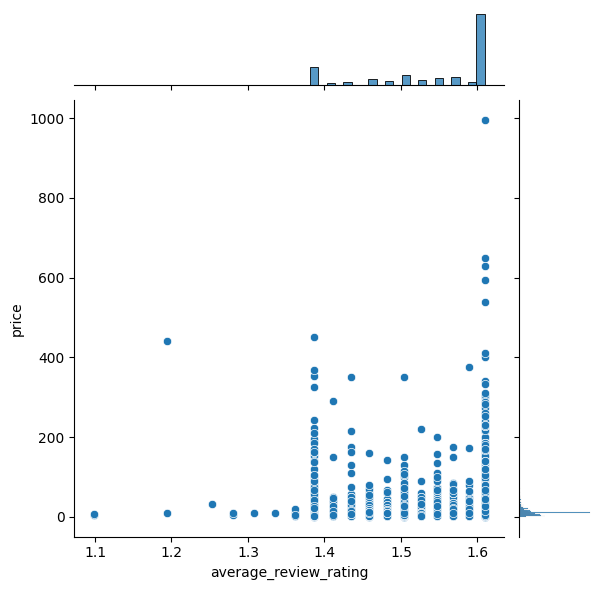

In [136]:
sns.jointplot(y='price', x='average_review_rating', data=df_train)

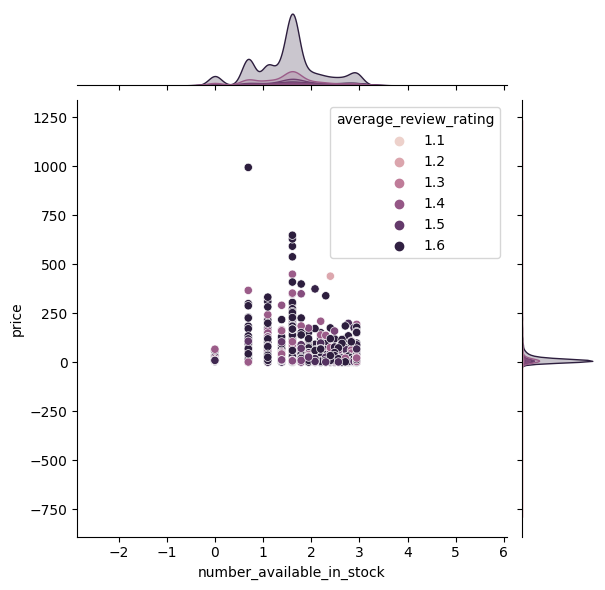

In [137]:
sns.jointplot(y='price', x='number_available_in_stock', data=df_train, hue='average_review_rating')

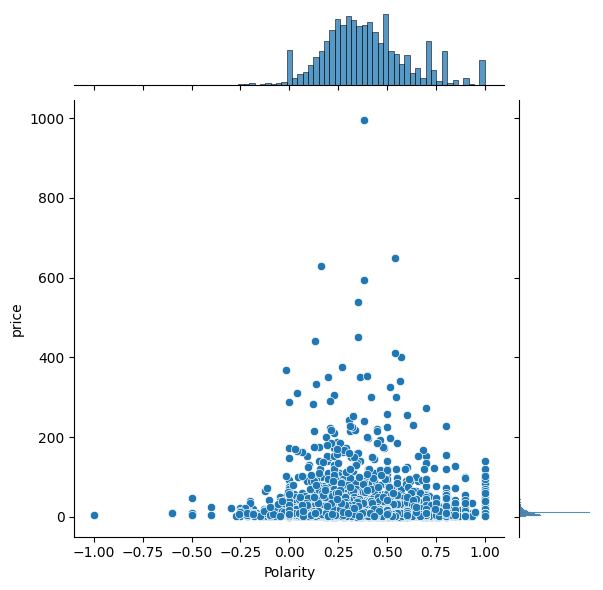

In [138]:
sns.jointplot(y='price', x='Polarity', data=df_train)

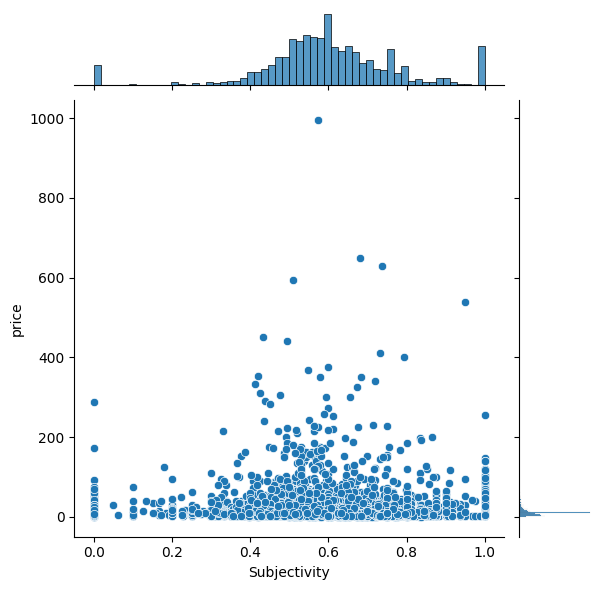

In [139]:
sns.jointplot(y='price', x='Subjectivity', data=df_train)